<a href="https://colab.research.google.com/github/IvanKatorgin/Big-Data-Analytics/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Аналитика больших данных". Домашнее задание 10. Кейсы и области применения больших данных. Каторгин И.П.

Перечень полей:
- state – штат
- account length – абонентский стаж
- area code – код региона
- phone number – номер телефона
- international plan – тарифный план для международных звонков
- voice mail plan – тарифный план для голосовой почты
- number vmail messages – количество сообщений голосовой почты
- total day minutes – общая длительность звонков в дневное время (мин)
- total day calls – общее количество звонков в дневное время
- total day charge – общая стоимость звонков в дневное время
- total eve minutes – общая длительность звонков в вечернее время (мин)
- total eve calls – общее количество звонков в вечернее время
- total eve charge – общая стоимость звонков в вечернее время
- total night minutes – общая длительность звонков в ночное время (мин)
- total night calls – общее количество звонков в ночное время
- total night charge – общая стоимость звонков в ночное время
- total intl minutes – общая длительность международных звонков (мин)
- total intl calls – общее количество международных звонков
- total intl charge – общая стоимость международных звонков
- number customer service calls – количество звонков в службу поддержки
- churned – покинул ли клиент компанию

Описание задания

используя pandas или pyspark, ответить на следующие вопросы:
1. Построить гистограмму количества звонков в техническую поддержку
2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)
3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции общего количества минут и количества звонков в техподдержку
4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента
5. Вывести top-5 самых много и самых мало говорящих клиентов
6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата
7. Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалить колонку, если вы делаете решение на pyspark
8. Разбить данные на множества для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные атрибуты)
9. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

## Установка PySpark

In [ ]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,998 kB]
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,545 kB]
Hit:14 https://ppa.lau

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz

In [ ]:
!tar -xvf spark-3.5.1-bin-hadoop3.tgz

spark-3.5.1-bin-hadoop3/
spark-3.5.1-bin-hadoop3/sbin/
spark-3.5.1-bin-hadoop3/sbin/spark-config.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slave.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/start-workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-slaves.sh
spark-3.5.1-bin-hadoop3/sbin/start-all.sh
spark-3.5.1-bin-hadoop3/sbin/stop-all.sh
spark-3.5.1-bin-hadoop3/sbin/workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/spark-daemon.sh
spark-3.5.1-bin-hadoop3/sbin/decommission-worker.sh
spark-3.5.1-bin-hadoop3/sbin/slaves.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-shuffle-service.sh
spark-3.5.1-bin-hadoop3/sbin/stop-history-server.sh
spark-3.5.1-bin-hadoop3/sbin/stop-worker.sh
spark-3.5.1-bin-hadoop3/sbin/decommission-slave.sh
spark-3.5.1-bin-hadoop3/sbin/stop-thriftserver.sh
spark-3.5.1-bin-hadoop3/sbin/start-worker.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slaves.sh
spark-3.5.1-bin-hadoop3/sbin/start-connect-server.sh


In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

## Загрузите данные при помощи spark.read.csv из приложенного файла

In [ ]:
df = spark.read.csv('churn.csv', inferSchema=True, header=True)

In [ ]:
df.show(5)

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+
|state|account_length|area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+------------

Построить гистограмму количества звонков в техническую поддержку

In [ ]:
import matplotlib.pyplot as plt

Для Matplotlib требуются данные Pandas или массив NumPy. Чтобы получить данные Pandas, используем команду toPandas() для преобразования данных

In [ ]:
pd_df = df.toPandas()

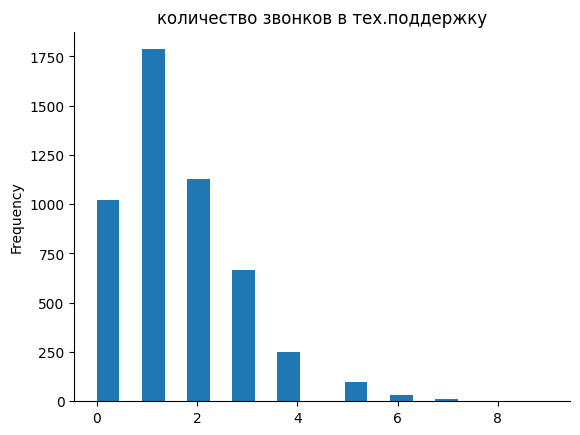

In [ ]:
pd_df['number_customer_service_calls'].plot(kind='hist', bins=20, title='количество звонков в тех.поддержку')
plt.gca().spines[['top', 'right',]].set_visible(False)

Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)

In [ ]:
pd_df.insert(loc = len(pd_df.columns), column = 'sum call', value = (pd_df['total_day_minutes'] + pd_df['total_eve_minutes'] + pd_df['total_night_minutes'] + pd_df['total_intl_minutes']))

In [ ]:
pd_df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,sum call
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,18.96,297.5,116,13.39,9.9,5,2.67,2,False,766.1
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,21.83,213.6,113,9.61,14.7,2,3.97,3,True,669.3
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,14.69,212.4,97,9.56,13.6,4,3.67,1,False,539.4
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,14.59,224.4,89,10.10,8.5,6,2.30,0,False,593.4


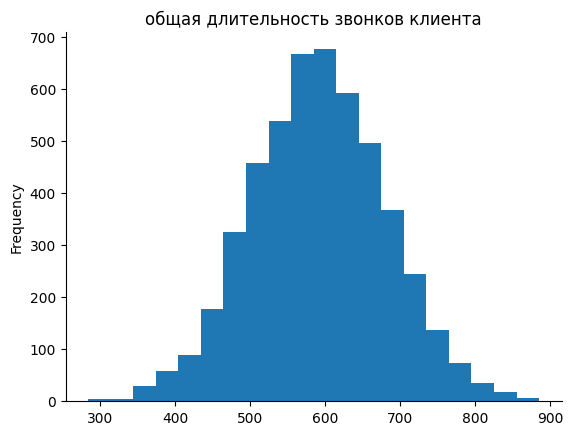

In [ ]:
pd_df['sum call'].plot(kind='hist', bins=20, title='общая длительность звонков клиента')
plt.gca().spines[['top', 'right',]].set_visible(False)

Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции общего количества минут и количества звонков в техподдержку

In [ ]:
mu_sum_call = pd_df['sum call'].sum() / pd_df['sum call'].count()
mu_sum_call

591.57886

In [ ]:
mu_customer_service_call = pd_df['number_customer_service_calls'].sum() / pd_df['number_customer_service_calls'].count()
mu_customer_service_call

1.5704

In [ ]:
st_otcl_sum_call = ((1/(pd_df['sum call'].count() - 1))*sum((pd_df['sum call'] - mu_sum_call)**2))**(0.5)
st_otcl_sum_call

89.07188069804415

In [ ]:
st_otcl_customer_service_call = ((1/(pd_df['number_customer_service_calls'].count() - 1))*sum((pd_df['number_customer_service_calls'] - mu_customer_service_call)**2))**(0.5)
st_otcl_customer_service_call

1.3063633327032225

In [ ]:
coef_corr = (1/(pd_df['number_customer_service_calls'].count() - 1))*(sum(((pd_df['sum call'] - mu_sum_call)/st_otcl_sum_call)*((pd_df['number_customer_service_calls'] - mu_customer_service_call)/st_otcl_customer_service_call)))
coef_corr

-0.011407910827441253

Проверим расчет коэффициента линейной корреляции встроенными методами

In [ ]:
import numpy as np

In [ ]:
np.corrcoef(pd_df['sum call'], pd_df['number_customer_service_calls'])

array([[ 1.        , -0.01140791],
       [-0.01140791,  1.        ]])

расчет выполнен корректно

Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

Кодируем значения по столбцу churned

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
pd_df.loc[:, 'churned'] = labelencoder.fit_transform(pd_df.loc[:, 'churned'])
pd_df['churned'] = pd_df['churned'].astype (int)
churned = pd_df['churned']
churned

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: churned, Length: 5000, dtype: int64

In [ ]:
pd_df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,sum call
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,564.8
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,18.96,297.5,116,13.39,9.9,5,2.67,2,0,766.1
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,21.83,213.6,113,9.61,14.7,2,3.97,3,1,669.3
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,14.69,212.4,97,9.56,13.6,4,3.67,1,0,539.4
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,14.59,224.4,89,10.10,8.5,6,2.30,0,0,593.4


Text(0.5, 1.0, 'точечный график по общему количеству минут / количеству звонков в поддержку')

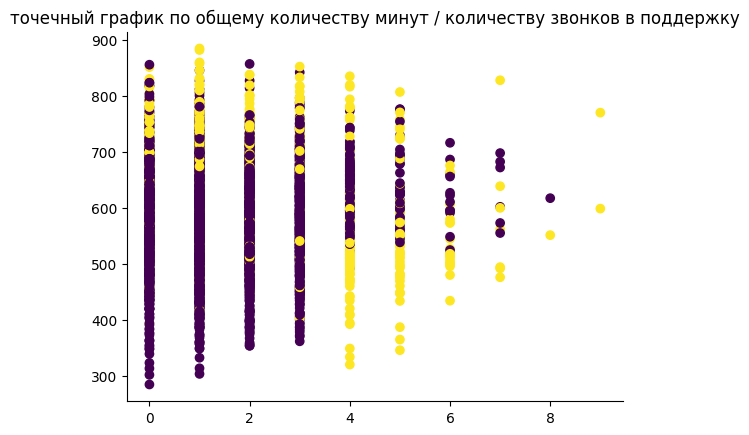

In [ ]:
plt.scatter(pd_df[['number_customer_service_calls']], pd_df[['sum call']], c=df[['churned']].collect())
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('точечный график по общему количеству минут / количеству звонков в поддержку')

Вывести top-5 самых много и самых мало говорящих клиентов

In [ ]:
pd_df.sort_values(by='sum call', ascending=False).head(5)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,sum call
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,21.21,275.4,102,12.39,13.3,9,3.59,1,1,885.0
289,OK,89,510,352-6976,no,no,0,303.9,95,51.66,...,22.18,312.1,89,14.04,5.3,3,1.43,1,1,882.2
3205,MS,111,408,345-3787,no,no,0,294.7,90,50.10,...,25.04,260.1,121,11.70,10.8,3,2.92,1,1,860.2
4991,AZ,97,510,410-3888,no,no,0,252.6,89,42.94,...,28.93,256.5,67,11.54,8.8,5,2.38,1,1,858.2
4271,MO,103,415,370-4667,no,yes,37,230.7,112,39.22,...,27.15,299.4,77,13.47,7.9,3,2.13,2,0,857.4


In [ ]:
pd_df.sort_values(by='sum call', ascending=True).head(5)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,sum call
648,WI,131,415,331-3174,no,yes,39,69.1,122,11.75,...,8.61,104.8,94,4.72,9.1,4,2.46,0,0,284.3
1233,IL,48,510,380-5246,no,no,0,128.2,71,21.79,...,4.09,116.3,80,5.23,8.9,3,2.40,0,0,301.5
3779,MN,141,408,362-8044,no,no,0,77.8,123,13.23,...,12.27,75.3,65,3.39,5.7,7,1.54,1,0,303.2
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,11.59,156.6,89,7.05,12.1,1,3.27,0,0,313.0
992,MI,45,510,375-8934,no,yes,26,91.7,104,15.59,...,12.80,63.3,103,2.85,7.7,5,2.08,1,0,313.3


Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [ ]:
fun_agg = {'total_day_minutes' : 'sum', 'total_day_charge' : 'sum', 'phone_number' : 'count', 'churned' : 'sum'}
column = {'total_day_minutes' : 'общее время разговора(мин)', 'total_day_charge' : 'общая стоимость звонков', 'phone_number': 'общее кол-во абонентов', 'churned': 'кол-во ушедших абонентов', 'state': 'штат'}
df_state = pd_df.groupby(['state']).agg(fun_agg).reset_index().rename(columns=column)
df_state['ср.стоимость минуты'] = (df_state['общая стоимость звонков'] / df_state['общее время разговора(мин)'] ).round(3)
df_state['% оттока абонентов по штату'] = (100 * df_state['кол-во ушедших абонентов'] / df_state['общее кол-во абонентов'] ).round(2)
df_state['% оттока абонентов среди всех штатов'] = 100*( df_state['кол-во ушедших абонентов'] / df_state['общее кол-во абонентов'].sum())
df_state[[ 'штат', 'ср.стоимость минуты', '% оттока абонентов по штату', '% оттока абонентов среди всех штатов' ]].sort_values('% оттока абонентов по штату',ascending=False).head(7)

,штат,ср.стоимость минуты,% оттока абонентов по штату,% оттока абонентов среди всех штатов
4,CA,0.17,26.92,0.28
31,NJ,0.17,25.00,0.56
47,WA,0.17,24.49,0.48
43,TX,0.17,22.41,0.52
26,MT,0.17,21.21,0.42
20,MD,0.17,20.59,0.42
33,NV,0.17,18.89,0.34


Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалить колонку, если вы делаете решение на pyspark

In [ ]:
import pandas as pd

In [ ]:
df_one_hot = pd_df.copy()
df_one_hot = pd.get_dummies (df_one_hot, columns=['state'], drop_first= True)
df_one_hot.head()

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,False,False,False,False,False,False,False,False,False,False
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,False,False,False,False,False,False,False,False,False,False
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,False,False,False,False,False,False,False,False,False,False
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,False,False,False,False,False,False,False,False,False,False
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,False,False,False,False,False,False,False,False,False,False


Разбить данные на множества для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные атрибуты)

In [ ]:
name = ['state', 'phone_number', 'area_code', 'international_plan', 'voice_mail_plan', 'all_calls' ]
df_data = df_one_hot.loc[ : , ~ df_one_hot.columns.isin(name) ]
df_data.head(5)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,False,False,False,False,False,False,False,False,False,False
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,False,False,False,False,False,False,False,False,False,False
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,False,False,False,False,False,False,False,False,False,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,False,False,False,False,False,False,False,False,False,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# формирование выбороки и целевой переменной
df_model = df_data.loc[ : , df_data.columns != 'churned' ]
data_target = pd.array(df_data['churned'])

In [ ]:
# разделим выборку на тренировочную и тестовую
x_train, x_test, y_train, y_test = train_test_split(df_model, data_target, train_size=0.2)

Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

# Построим модель LDA (Линейный дискриминантный анализ)

In [ ]:
# обучаем модель
lda = LinearDiscriminantAnalysis()

In [ ]:
# получаем коэфф. модели
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'визуализация модели')

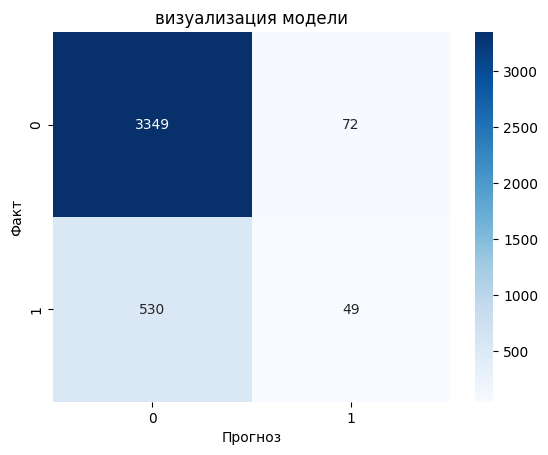

In [ ]:
# визуализируем результаты
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.title('визуализация модели')

In [ ]:
# точность модели
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8495

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='weighted')

0.8049861643835615

Точность модели LDA  accuracy = 0,8495, значение F-мера = 0,804.
На выходе получили среднюю модель для предсказания событий (точность предсказания 80,5%).

# Построим модель предсказания LR, с помощью логистической регрессии

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# точность модели
accuracy_score(y_test, lr.predict(x_test))

0.85525

In [ ]:
f1_score(y_test, lr.predict(x_test), average='weighted')

0.7927239055604919

Точность модели LR  accuracy = 0,855, значение F-мера = 0,793.
На выходе получили среднюю модель для предсказания событий (точность предсказания 79,3%).

# Выводы:
- Построена гистограмма количества звонков в техническую поддержку
- Построена гистограмма общей длительности звонков клиента (дневных + ночных + вечерних + международных)
- Рассчитан линейный коэффициент корреляции общего количества минут и количества звонков в техподдержку
- Визуализирован точечный график по общему количеству минут / количеству звонков в поддержку
- Выведены top-5 самых много и самых мало говорящих клиентов
- Рассчитаны и выведены данные по оттоку клиентов и средней стоимости минуты дневного времени разговора в зависимости от штата
- Построены и обучены две модели классификации (LDA и LR) и выполнена оценка качества (точность) на отложенной выборке по обоим моделям. В целом модели пригодны для дальнейшего использования